# 보건 의료 데이터 
## 보험료(charges) 예측하기

# 0. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/fintech-data/Revolution/main/data/insurance.csv')

In [ ]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 1. 데이터 전처리

In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1-1. 결측치 제거 

In [ ]:
# 결측치 없음 
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 1-2. 이상치 탐지

In [ ]:
insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects   
%matplotlib inline

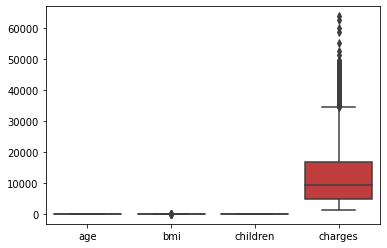

In [ ]:
bplot= sns.boxplot(data=insurance)

In [ ]:
# charges의 값이 너무 커서 나머지 값들이 제대로 보이지 않으므로 하나하나 그려보자

In [ ]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

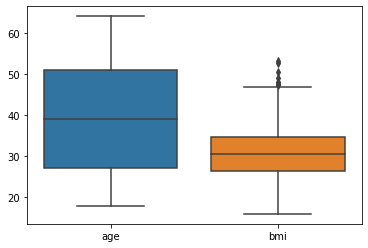

In [ ]:
bplot= sns.boxplot(data= insurance[['age', 'bmi']])

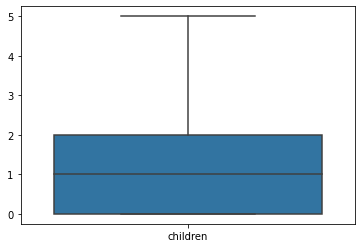

In [ ]:
bplot= sns.boxplot(data= insurance[['children']])

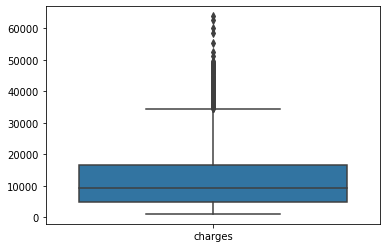

In [ ]:
bplot= sns.boxplot(data= insurance[['charges']])

### 결론 : charges와 BMI에 이상치 값들이 있는 것을 확인
 - 기본 :  x < Q1 - IQR or X > Q3 + IQR 값들을 제거
 - 데이터에 따라 이상치가 필요하다고 판단하여 제거하지 않는 경우도 있음 
    - 보험의 경우 이상치가 있는 데이터가 필요하기에 이상치를 제거하지 않고 로그변환을 통해 일정부분 해결하자

# 2. 탐색적 자료분석 (EDA)

## 2-1 범주형

In [ ]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

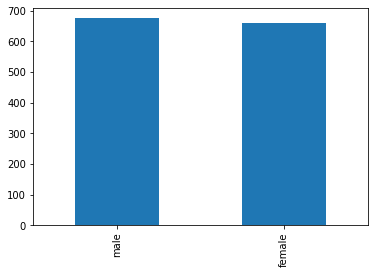

In [ ]:
insurance['sex'].value_counts().plot.bar()

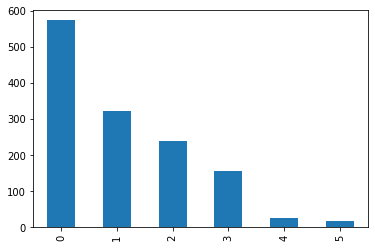

In [ ]:
insurance['children'].value_counts().plot.bar()

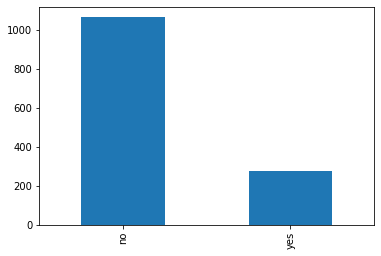

In [ ]:
insurance['smoker'].value_counts().plot.bar()

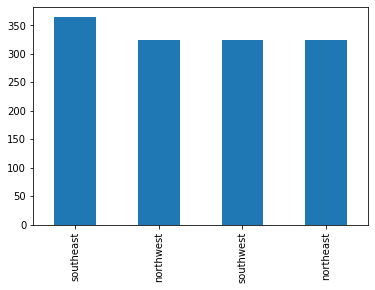

In [ ]:
insurance['region'].value_counts().plot.bar()

## 2-2 범주형 변수와 y와의 관계 
- 범주형 & 연속형 : bar plot, box plot 등

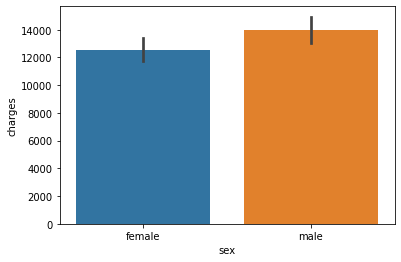

In [ ]:
# 남성일수록 보험료가 비싸다 
sns.barplot(x='sex', y='charges', data=insurance)

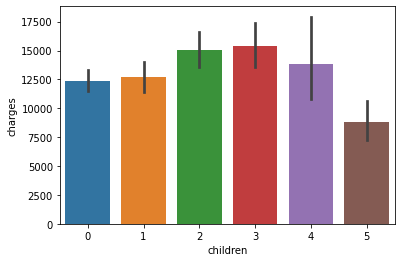

In [ ]:
# 자녀에 따른 보혐료의 차이는 미비하나 2~3명일 경우 보험료가 가장 비싸다.
sns.barplot(x='children', y='charges', data=insurance)

# Q. 5명일 때 특히 보험료가 작게 나온다 -> 이는 데이터 자체가 작아서이다. 위의 bar plot으로도 확인 가능 

In [ ]:
#자녀수가 4, 5일 때 데이터가 적다.
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

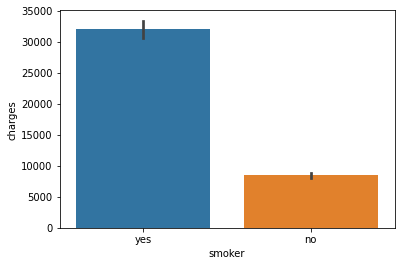

In [ ]:
# 담배를 필경우 피지 않을 경우보다 보험료가 3배 이상 비싸다 => 주요 변수
sns.barplot(x='smoker', y='charges', data=insurance)

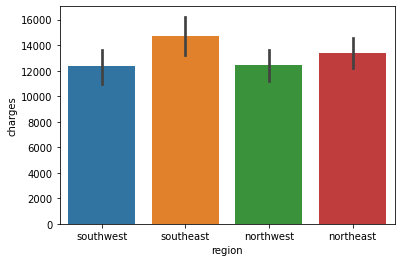

In [ ]:
# region에 의한 차이는 미비하다 남동쪽이 다른 지역에 비해 보험료가 비싸다 
sns.barplot(x='region', y='charges', data=insurance)

- 그 이유에 대해서 살펴본 결과 남부 지역(지도로 보면 남동쪽)에 비만률이 높아 성인병을 걸릴 확률 등 건강이 더 안좋아 보험료가 더 높은 것을 알 수있다 (배경지식) <br> 
출처 : https://www.kff.org/racial-equity-and-health-policy/issue-brief/health-and-health-coverage-in-the-south-a-data-update/

-> 뒤에 bmi를 토대로 검증해보자 

## 가설 1. 남동부 지역의 BMI가 더 높다.
- 확인 : boxplot을 그려보자

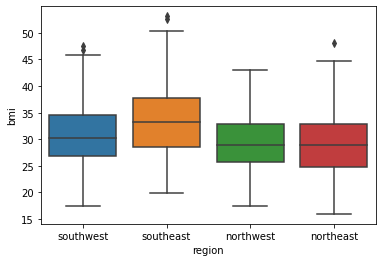

In [ ]:
bplot= sns.boxplot(y = 'bmi', x= 'region', data = insurance)

# 실제로 남동쪽의 BMI가 더 높은것을 확인 할 수있다. 
# 가설 성립! 

## 2-3 연속형

In [ ]:
import warnings
warnings.filterwarnings('ignore')

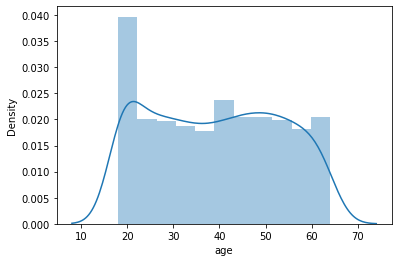

In [ ]:
# 20대가 가장 많다 
sns.distplot(insurance['age'])

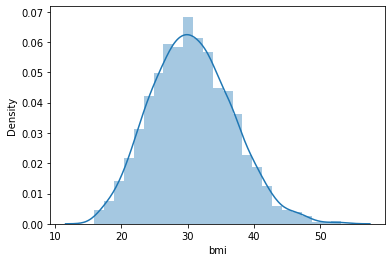

In [ ]:
# 정규분포 모형을 띄며 bmi 30~35 사이가 가장 많다.
sns.distplot(insurance['bmi'])

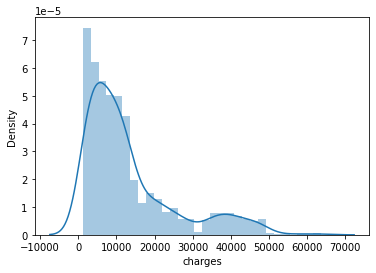

In [ ]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환
sns.distplot(insurance['charges'])

In [ ]:
import numpy as np

<AxesSubplot:xlabel='charges', ylabel='Density'>

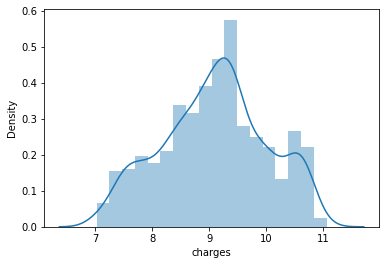

In [ ]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환 -> 꼬리가 사라짐 
sns.distplot(np.log(insurance['charges']))`b

In [ ]:
# y -> log(y)를 사용하여 회귀분석

# 2-4 연속형 & 종속변수와의 관계
- 연속형 & 연속형 : 상관관계

In [ ]:
corr = insurance.corr(method = 'pearson') 
corr

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

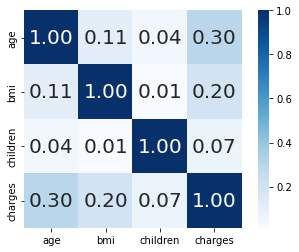

In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

# 종속변수(보험료)와의 상관관계의 경우, 나이 > BMI 순으로 상관관계가 높은 것을 알 수 있다

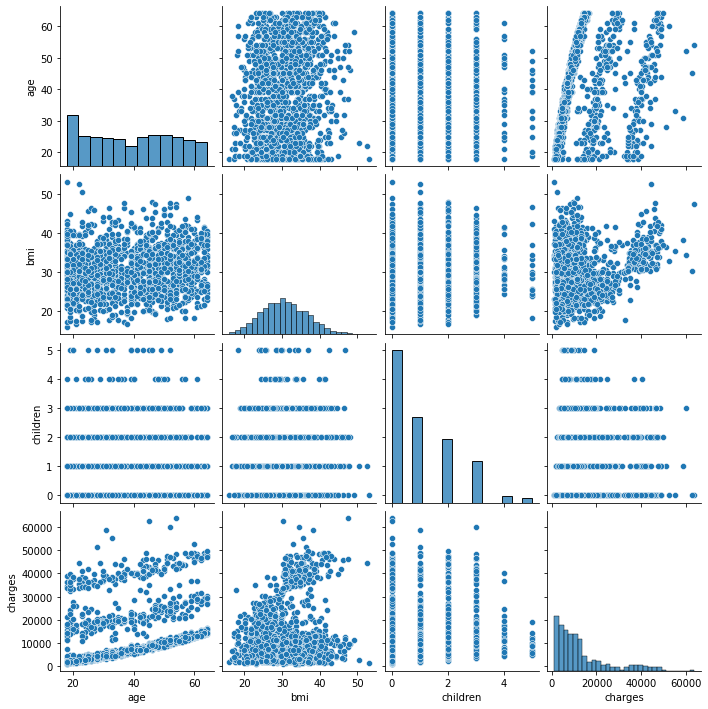

In [ ]:
# pair plot
sns.pairplot(insurance)  
plt.show()
plt.close()

# 3. 모델링
- 회귀 예측 모델링 : Regression, RandomForest, SVM 
- 설명은 Notion 참조

## 3-1. 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
insurance_data = pd.get_dummies(insurance)

In [ ]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
X= insurance_data[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]  
y = np.log(insurance_data['charges'])

In [ ]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수 
                                                    y, #종속 변수
                                                    test_size=0.3,  #검증 30%   
                                                    random_state=10)

In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# train의 R^2 값
lr.score(X_train, y_train)

0.7785080408448602

In [ ]:
# test의 R^2 값
lr.score(X_test, y_test)

0.7392864901689731

In [ ]:
y_predict = lr.predict(X_test)

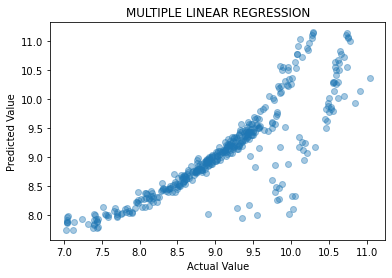

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 모델 평가 지표 : RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.4519798548425645

In [ ]:
# 그림을 그려보니 Quadratic으로 나온다 -> 선형이 아닌 비선형을 이용해야함. 

### 3-3-1. 비선형 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_
X_test_poly = poly_features.transform(X_test)
y_predict = lin_reg.predict(X_test_poly)

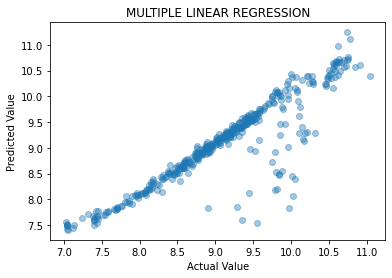

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# 비선형성을 활용하니 RMSE가 0.37로 매우 작다 

0.3798364214527997

## 3-2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor() # 분류 트리(default) 객체 생성
rf.fit(X=X_train, y=y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predict = rf.predict(X = X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.4로 낮아지는 것을 볼 수있다

0.40141868425282107

## 3-3. SVM 

In [ ]:
from sklearn.svm import SVR #회귀는 SVR

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_predict = svr.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.70으로 매우 커졌다. 

0.47680764772105283

In [ ]:
# RMSE가 0.47로 커졌다. 

In [ ]:
from sklearn.svm import SVR #회귀는 SVR

svr = SVR(kernel='poly', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_predict = svr.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.70으로 매우 커졌다. -> 

0.6962950858532372

## 3-4. 앙상블

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
voting_model = VotingRegressor(
    estimators=[('lr',lin_reg),('rf',rf),('svc',svr)], # 3개의 약한 학습기
    n_jobs = 1
)

In [ ]:
# 앙상블 모델 학습
voting_model.fit(X_train,y_train)

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_spli

In [ ]:
ens_predict = voting_model.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, ens_predict)**0.5
RMSE
# RMSE가 0.41이다. 

0.44431096839796397

# 결론 : RMSE가 가장 작은 비선형회귀일 경우 가장 보험료 예측을 잘한다